In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
from datetime import datetime

In [3]:
df= pd.read_csv('Netflix TV Shows and Movies.csv')

CLEANING

In [5]:
df

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
0,0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,tt0075314,8.3,795222.0
1,1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,tt0071853,8.2,530877.0
2,2,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,tt0079470,8.0,392419.0
3,3,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,tt0070047,8.1,391942.0
4,4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,tt0063929,8.8,72895.0
...,...,...,...,...,...,...,...,...,...,...,...
5278,5278,tm1040816,Momshies! Your Soul is Mine,MOVIE,Three women with totally different lives accid...,2021,NaN,108,tt14412240,5.8,26.0
5279,5279,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,tt13857480,6.9,39.0
5280,5280,tm1045018,Clash,MOVIE,A man from Nigeria returns to his family in Ca...,2021,NaN,88,tt14620732,6.5,32.0
5281,5281,tm1098060,Shadow Parties,MOVIE,A family faces destruction in a long-running c...,2021,NaN,116,tt10168094,6.2,9.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5283 entries, 0 to 5282
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              5283 non-null   int64  
 1   id                 5283 non-null   object 
 2   title              5283 non-null   object 
 3   type               5283 non-null   object 
 4   description        5278 non-null   object 
 5   release_year       5283 non-null   int64  
 6   age_certification  2998 non-null   object 
 7   runtime            5283 non-null   int64  
 8   imdb_id            5283 non-null   object 
 9   imdb_score         5283 non-null   float64
 10  imdb_votes         5267 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 454.1+ KB


In [9]:
df.describe()

,index,release_year,runtime,imdb_score,imdb_votes
count,5283.000000,5283.000000,5283.000000,5283.000000,5.267000e+03
mean,2641.000000,2015.879992,79.199886,6.533447,2.340719e+04
std,1525.215067,7.346098,38.915974,1.160932,8.713432e+04
min,0.000000,1953.000000,0.000000,1.500000,5.000000e+00
25%,1320.500000,2015.000000,45.000000,5.800000,5.210000e+02
50%,2641.000000,2018.000000,87.000000,6.600000,2.279000e+03
75%,3961.500000,2020.000000,106.000000,7.400000,1.014400e+04
max,5282.000000,2022.000000,235.000000,9.600000,2.268288e+06


In [15]:
#creation of a column with a score(weighted) considering both imdb score and votes.
df["weighted_score"] = df["imdb_score"] * df["imdb_votes"]

# Then we create the normalized score
df["normalized_weighted_score"] = (df["weighted_score"] - df["weighted_score"].min()) \
                                                / (df["weighted_score"].max() - df["weighted_score"].min()) * 100

In [17]:
df

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes,weighted_score,normalized_weighted_score
0,0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,tt0075314,8.3,795222.0,6600342.6,33.066232
1,1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,tt0071853,8.2,530877.0,4353191.4,21.808475
2,2,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,tt0079470,8.0,392419.0,3139352.0,15.727394
3,3,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,tt0070047,8.1,391942.0,3174730.2,15.904631
4,4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,tt0063929,8.8,72895.0,641476.0,3.213558
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5278,5278,tm1040816,Momshies! Your Soul is Mine,MOVIE,Three women with totally different lives accid...,2021,NaN,108,tt14412240,5.8,26.0,150.8,0.000653
5279,5279,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,tt13857480,6.9,39.0,269.1,0.001246
5280,5280,tm1045018,Clash,MOVIE,A man from Nigeria returns to his family in Ca...,2021,NaN,88,tt14620732,6.5,32.0,208.0,0.000940
5281,5281,tm1098060,Shadow Parties,MOVIE,A family faces destruction in a long-running c...,2021,NaN,116,tt10168094,6.2,9.0,55.8,0.000177


In [23]:
df.sort_values(by='normalized_weighted_score', ascending = False)

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes,weighted_score,normalized_weighted_score
246,246,tm92641,Inception,MOVIE,"Cobb, a skilled thief who commits corporate es...",2010,PG-13,148,tt1375666,8.8,2268288.0,19960934.4,100.000000
101,101,tm122434,Forrest Gump,MOVIE,A man with a low IQ has accomplished great thi...,1994,PG-13,142,tt0109830,8.8,1994599.0,17552471.2,87.934104
229,229,ts4,Breaking Bad,SHOW,"When Walter White, a New Mexico chemistry teac...",2008,TV-MA,48,tt0903747,9.5,1727694.0,16413093.0,82.226057
662,662,tm41792,Django Unchained,MOVIE,"With the help of a German bounty hunter, a fre...",2012,R,165,tt1853728,8.4,1472668.0,12370411.2,61.973068
104,104,tm57554,Saving Private Ryan,MOVIE,"As U.S. troops storm the beaches of Normandy, ...",1998,R,169,tt0120815,8.6,1346020.0,11575772.0,57.992092
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4837,4837,tm1040688,Three Songs for Benazir,MOVIE,"The story of Shaista, a young man whoâ€”newly ...",2021,NaN,22,tt14608922,7.7,NaN,NaN,NaN
4953,4953,tm1159301,Forgive Us Our Trespasses,MOVIE,"In 1939 Germany, a disabled farm boy is pursue...",2022,PG-13,13,tt17162524,6.5,NaN,NaN,NaN
5038,5038,tm1119455,Camp Confidential: America's Secret Nazis,MOVIE,"Camp Confidential: America's Secret Nazis, is ...",2021,PG-13,34,tt15470770,6.3,NaN,NaN,NaN
5102,5102,tm1161223,Cat Burglar,MOVIE,"In this edgy, over-the-top, interactive trivia...",2022,PG-13,12,tt17321170,6.9,NaN,NaN,NaN


In [25]:
# we do not want the nulls for votes
df.dropna(subset = ['imdb_votes'], inplace=True)

In [27]:
df

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes,weighted_score,normalized_weighted_score
0,0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,tt0075314,8.3,795222.0,6600342.6,33.066232
1,1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,tt0071853,8.2,530877.0,4353191.4,21.808475
2,2,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,tt0079470,8.0,392419.0,3139352.0,15.727394
3,3,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,tt0070047,8.1,391942.0,3174730.2,15.904631
4,4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,tt0063929,8.8,72895.0,641476.0,3.213558
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5278,5278,tm1040816,Momshies! Your Soul is Mine,MOVIE,Three women with totally different lives accid...,2021,NaN,108,tt14412240,5.8,26.0,150.8,0.000653
5279,5279,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,tt13857480,6.9,39.0,269.1,0.001246
5280,5280,tm1045018,Clash,MOVIE,A man from Nigeria returns to his family in Ca...,2021,NaN,88,tt14620732,6.5,32.0,208.0,0.000940
5281,5281,tm1098060,Shadow Parties,MOVIE,A family faces destruction in a long-running c...,2021,NaN,116,tt10168094,6.2,9.0,55.8,0.000177


In [29]:
# our data frame is cleaned and ready. I also made a copy in oreder not to make changes in the original cleaned one.
df1 = df.copy()

In [158]:
df1

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes,weighted_score,normalized_weighted_score
0,0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,tt0075314,8.3,795222.0,6600342.6,33.066232
1,1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,tt0071853,8.2,530877.0,4353191.4,21.808475
2,2,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,tt0079470,8.0,392419.0,3139352.0,15.727394
3,3,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,tt0070047,8.1,391942.0,3174730.2,15.904631
4,4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,tt0063929,8.8,72895.0,641476.0,3.213558
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5278,5278,tm1040816,Momshies! Your Soul is Mine,MOVIE,Three women with totally different lives accid...,2021,NaN,108,tt14412240,5.8,26.0,150.8,0.000653
5279,5279,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,tt13857480,6.9,39.0,269.1,0.001246
5280,5280,tm1045018,Clash,MOVIE,A man from Nigeria returns to his family in Ca...,2021,NaN,88,tt14620732,6.5,32.0,208.0,0.000940
5281,5281,tm1098060,Shadow Parties,MOVIE,A family faces destruction in a long-running c...,2021,NaN,116,tt10168094,6.2,9.0,55.8,0.000177


In [33]:
#I will work in tv shows data and my partner Giannis in Movies data. So I created a dataframe only for tv shows.
tv_show = df[df['type'] == 'SHOW']

In [35]:
tv_show

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes,weighted_score,normalized_weighted_score
4,4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,tt0063929,8.8,72895.0,641476.0,3.213558
28,28,ts45948,Monty Python's Fliegender Zirkus,SHOW,Monty Python's Fliegender Zirkus consisted of ...,1972,TV-MA,43,tt0202477,8.1,2144.0,17366.4,0.086900
43,43,ts20681,Seinfeld,SHOW,A stand-up comedian and his three offbeat frie...,1989,TV-PG,24,tt0098904,8.9,302700.0,2694030.0,13.496424
51,51,ts22082,Knight Rider,SHOW,"Michael Long, an undercover police officer, is...",1982,TV-PG,51,tt0083437,6.9,33760.0,232944.0,1.166898
53,53,ts21715,Thomas & Friends,SHOW,Thomas & Friends is a British children's telev...,1984,TV-Y,10,tt0086815,6.5,4948.0,32162.0,0.161023
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5252,5252,ts309235,Christmas Flow,SHOW,An unlikely Christmas romance blossoms between...,2021,TV-MA,50,tt15340790,5.8,702.0,4071.6,0.020296
5254,5254,ts307816,Korean Cold Noodle Rhapsody,SHOW,"Refreshing and flavorful, naengmyeon is Koreaâ...",2021,TV-PG,49,tt15772846,7.3,15.0,109.5,0.000446
5266,5266,ts273317,Pitta Kathalu,SHOW,"Four different women, four journeys of love an...",2021,TV-MA,37,tt13879000,5.1,727.0,3707.7,0.018473
5275,5275,ts286386,The Big Day,SHOW,"For six engaged couples, happily ever after be...",2021,TV-MA,45,tt13887518,4.6,327.0,1504.2,0.007434


1. tv shows with score more than 8.5.

In [182]:
#in this moment I should inform you that we won't use the normalized score we created earlier.
more_than= tv_show[tv_show['imdb_score'] >= 8.5]  # I created a dataset only for scores >8.5 in imdb for tv shows.

In [216]:
more_than

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes,weighted_score,normalized_weighted_score
4,4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,tt0063929,8.8,72895.0,641476.0,3.213558
43,43,ts20681,Seinfeld,SHOW,A stand-up comedian and his three offbeat frie...,1989,TV-PG,24,tt0098904,8.9,302700.0,2694030.0,13.496424
103,103,ts20339,One Piece,SHOW,"Years ago, the fearsome Pirate King, Gol D. Ro...",1999,TV-14,23,tt0388629,8.8,112586.0,990756.8,4.963382
105,105,ts34435,Cowboy Bebop,SHOW,"In 2071, roughly fifty years after an accident...",1998,TV-14,25,tt0213338,8.9,112887.0,1004694.3,5.033206
113,113,ts20983,Neon Genesis Evangelion,SHOW,"At the turn of the century, the Angels returne...",1995,TV-14,24,tt0112159,8.5,64727.0,550179.5,2.756182
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4628,4628,ts296563,Who Rules The World,SHOW,A legendary wuxia romance that focuses on the ...,2022,TV-PG,44,tt14950036,9.2,81.0,745.2,0.003631
4768,4768,ts313668,Tear Along the Dotted Line,SHOW,A cartoonist in Rome with his armadillo-for-a-...,2021,TV-14,19,tt15614372,8.7,7595.0,66076.5,0.330927
4792,4792,ts223450,Move to Heaven,SHOW,"Finding life in all that's left behind, a trau...",2021,TV-MA,52,tt11052470,8.6,5307.0,45640.2,0.228546
4997,4997,ts275448,Navillera,SHOW,A coming-of-age drama about a 23-year-old ball...,2021,NaN,64,tt13885302,8.8,2024.0,17811.2,0.089128


In [ ]:
#we wanted to create a table with top 10 tv shows in netflix as an ispiration for our tv-show. we included tv shows with 
#score>=8.5 and most voted by audience.

In [188]:
top_10 = more_than.sort_values(by='imdb_votes', ascending = False).head(10)

In [190]:
top_10

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes,weighted_score,normalized_weighted_score
229,229,ts4,Breaking Bad,SHOW,"When Walter White, a New Mexico chemistry teac...",2008,TV-MA,48,tt0903747,9.5,1727694.0,16413093.0,82.226057
1145,1145,ts38796,Stranger Things,SHOW,"When a young boy vanishes, a small town uncove...",2016,TV-14,52,tt4575572,8.7,989090.0,8605083.0,43.109562
660,660,ts278,Black Mirror,SHOW,A contemporary British re-working of The Twili...,2011,TV-MA,59,tt2085059,8.8,515577.0,4537077.6,22.729707
883,883,ts6,House of Cards,SHOW,"Set in present day Washington, D.C., House of ...",2013,TV-MA,52,tt1856010,8.7,494092.0,4298600.4,21.534986
859,859,ts20110,Peaky Blinders,SHOW,"A gangster family epic set in 1919 Birmingham,...",2013,TV-MA,58,tt2442560,8.8,485506.0,4272452.8,21.403992
239,239,ts21465,Supernatural,SHOW,"When they were boys, Sam and Dean Winchester l...",2005,TV-14,45,tt0460681,8.5,428639.0,3643431.5,18.252727
3022,3022,ts89259,The Queen's Gambit,SHOW,"In a Kentucky orphanage in the 1950s, a young ...",2020,TV-MA,56,tt10048342,8.6,406350.0,3494610.0,17.507162
1143,1143,ts8,Better Call Saul,SHOW,Six years before Saul Goodman meets Walter Whi...,2015,TV-MA,49,tt3032476,8.8,404920.0,3563296.0,17.851265
1186,1186,ts36631,Narcos,SHOW,A gritty chronicle of the war against Colombia...,2015,TV-MA,52,tt2707408,8.8,404486.0,3559476.8,17.832131
1724,1724,ts55668,Dark,SHOW,A missing child causes four families to help e...,2017,TV-MA,56,tt5753856,8.7,354443.0,3083654.1,15.448359


2. age

In [ ]:
#we want to see in whitch ages are the top rated tv shows aimed at(dataset -> more_than).

In [218]:
#we don't want the nulls in age column.  
dropage = more_than[more_than['age_certification'].notna()]

In [220]:
dropage

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes,weighted_score,normalized_weighted_score
4,4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,tt0063929,8.8,72895.0,641476.0,3.213558
43,43,ts20681,Seinfeld,SHOW,A stand-up comedian and his three offbeat frie...,1989,TV-PG,24,tt0098904,8.9,302700.0,2694030.0,13.496424
103,103,ts20339,One Piece,SHOW,"Years ago, the fearsome Pirate King, Gol D. Ro...",1999,TV-14,23,tt0388629,8.8,112586.0,990756.8,4.963382
105,105,ts34435,Cowboy Bebop,SHOW,"In 2071, roughly fifty years after an accident...",1998,TV-14,25,tt0213338,8.9,112887.0,1004694.3,5.033206
113,113,ts20983,Neon Genesis Evangelion,SHOW,"At the turn of the century, the Angels returne...",1995,TV-14,24,tt0112159,8.5,64727.0,550179.5,2.756182
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4540,4540,ts302363,Twenty Five Twenty One,SHOW,The dreams of two young people are crushed by ...,2022,TV-14,76,tt17513352,8.7,4081.0,35504.7,0.177769
4612,4612,ts297483,Hometown Cha-Cha-Cha,SHOW,A big-city dentist opens up a practice in a cl...,2021,TV-14,78,tt14518756,8.5,9987.0,84889.5,0.425176
4628,4628,ts296563,Who Rules The World,SHOW,A legendary wuxia romance that focuses on the ...,2022,TV-PG,44,tt14950036,9.2,81.0,745.2,0.003631
4768,4768,ts313668,Tear Along the Dotted Line,SHOW,A cartoonist in Rome with his armadillo-for-a-...,2021,TV-14,19,tt15614372,8.7,7595.0,66076.5,0.330927


In [222]:
final = dropage.groupby(['age_certification']).count().sort_values(by='title', ascending = False)

In [224]:
final

,index,id,title,type,description,release_year,runtime,imdb_id,imdb_score,imdb_votes,weighted_score,normalized_weighted_score
age_certification,,,,,,,,,,,,
TV-MA,45,45,45,45,45,45,45,45,45,45,45,45
TV-14,36,36,36,36,36,36,36,36,36,36,36,36
TV-PG,10,10,10,10,10,10,10,10,10,10,10,10
TV-G,3,3,3,3,3,3,3,3,3,3,3,3
TV-Y,3,3,3,3,3,3,3,3,3,3,3,3
TV-Y7,2,2,2,2,2,2,2,2,2,2,2,2


<Axes: xlabel='title', ylabel='age_certification'>

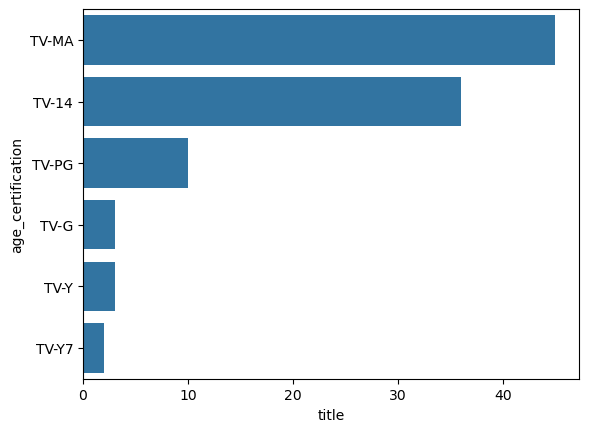

In [226]:
sns.barplot(x='title', y='age_certification', data =final)

3.what was the duration per episode of the top rated tv shows(imdb score>=8.5)

In [236]:
duration = more_than.groupby(['runtime']).count().sort_values(by='title', ascending = False).head(10)

In [238]:
duration.sort_values(by='title', ascending = False).head(10)

,index,id,title,type,description,release_year,age_certification,imdb_id,imdb_score,imdb_votes,weighted_score,normalized_weighted_score
runtime,,,,,,,,,,,,
50,7,7,7,7,7,7,6,7,7,7,7,7
24,7,7,7,7,7,7,7,7,7,7,7,7
25,6,6,6,6,6,6,6,6,6,6,6,6
22,4,4,4,4,4,4,4,4,4,4,4,4
28,4,4,4,4,4,4,3,4,4,4,4,4
52,4,4,4,4,4,4,4,4,4,4,4,4
56,4,4,4,4,4,4,4,4,4,4,4,4
43,4,4,4,4,4,4,4,4,4,4,4,4
58,4,4,4,4,4,4,4,4,4,4,4,4


<Axes: xlabel='runtime', ylabel='title'>

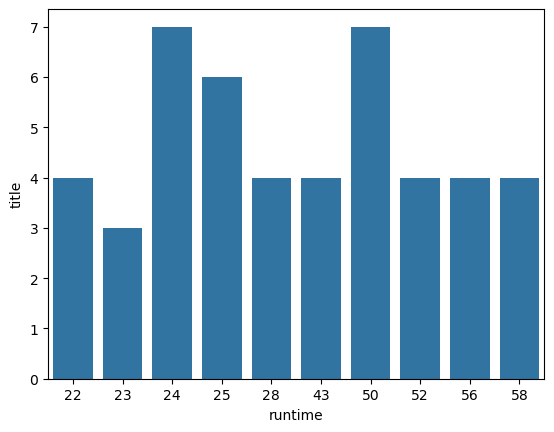

In [244]:
sns.barplot(y='title', x='runtime', data =duration)